<a href="https://colab.research.google.com/github/muhammed-shamil/PREDICTION/blob/main/goldprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here i am gonna show you a gold price prediction

**Work Flow**
*  so first we need the gold price data. it consisting of gold price of several days in a period of 10 years.using this data to train our machine learning alghorithm and it can predict the gold price for that specific value
* Data Processing,we need to process the data properly
*Data Analysing,find which features are important and which features are correlated with each other
* train test split,our orginal data is split in two parts trainig data and testing data. using Train data to train our machine and find how well our model is performing.use our test data to test our machine learning.In this case we use regression model,because it is a regression problem

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

Data collection and Pocesssing

In [ ]:
# loading the csv data to pandas DataFrame

gold_data = pd.read_csv('/content/drive/MyDrive/data science /work/project/gld_price_data.csv')

In [ ]:
# print the first 5 rows in the dataframe

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In here in this data set we can see,
* Date - day,month and year are shown here
* SPX - smp index so it is the capitalization index.it is the one of the stocks
* GLD - gold price
* USO - united states oil price
* SLV - silver price
* EUR/USD - its a pair of Euro and Dollar.in this case one Euro is equal to 1.47 usd

In [ ]:
# print last five rows of the dataframe

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#no of rows and columns

gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the no of missing value

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
*  
A positive correlation exists when two variables move in the same direction as one another. A basic example of positive correlation is height and weight—taller people tend to be heavier, and vice versa.
2. Negative Correlation
*  Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa

In [ ]:
correlation = gold_data.corr()

<Axes: >

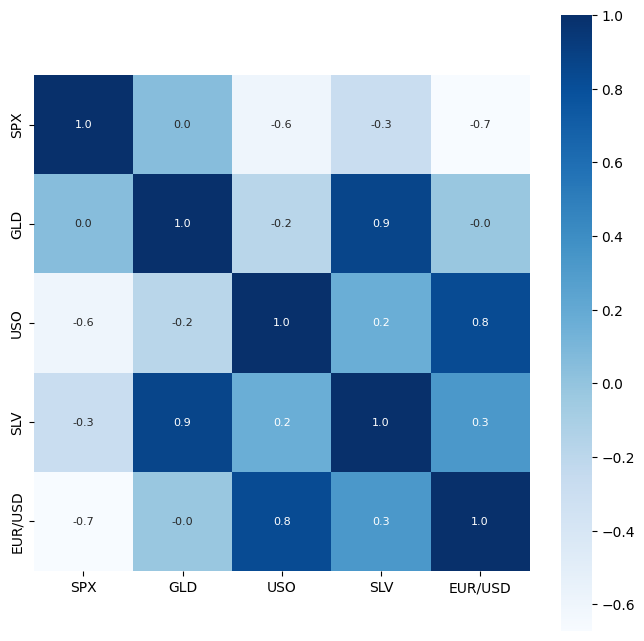

In [ ]:
# constructing a heatmap to understan the correlation

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap= 'Blues')

In this case values lie between -0.6 and 0.1
* this gold and silver column has a value of 0.9 that means they are positively correlated so that means gold price increases and silver price also increses vise versa
* spx value and usb value which has a -0.6 as their value value that means usb value decreases the spx value will increase

In [ ]:
# correlation value of gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


* USO is negatively correlated
* EUR/USD is slightly negetively correlated
* Others are positively correlated

<Axes: xlabel='GLD', ylabel='Density'>

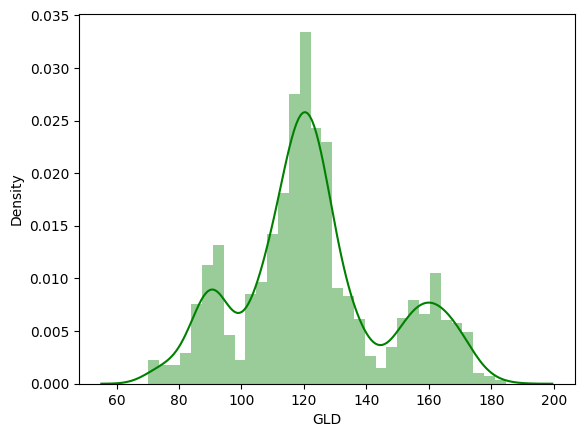

In [ ]:
# checking the distribution of the gold price

sns.distplot(gold_data['GLD'],color='green')

**The most values lie in the range of 120,most of the price value lies in 120 range. we also have price in 180 but they are very less**

Splitting the Features and the Target

In [ ]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state= 2)

Model Training : Random Forest Regressor

#***Random Forest Regressor***

**Working of Random Forest Alghorithm**
* Random forest is a type of supervised learning algorithm that uses ensemble methods to solve both regression and classification problems,which combines the output of multiple decision trees to reach a single result.
* Once we feed the training data into our Random Forest Regressor it can make new predictions ,once this model is trained we will evaluate our model based on test data which we are splitted

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
# training the model

regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data

test_data_prediction = regressor.predict(x_test)

In [ ]:
#this is the predicted value

print(test_data_prediction)

[168.47129931  81.55170017 116.23530038 127.71300066 120.74550118
 154.76779799 150.01449903 126.18260044 117.49759876 126.17430101
 116.70110113 171.41880096 141.62339835 168.01299875 115.19109994
 117.91640056 138.38790359 169.93990028 159.49680318 156.47210055
 155.03829996 125.29950029 176.66359995 157.10510363 125.25880011
  93.75569979  77.9613999  120.87810029 119.06619944 167.35550063
  88.25950025 125.37660069  91.04150037 117.8273001  121.21379911
 135.89020042 115.73800101 115.01400074 146.05749937 107.50390097
 104.1065024   87.18449796 126.53930057 118.08970008 154.04399892
 119.5721001  108.38229988 108.09919851  93.00609994 127.22439756
  75.07280004 113.64539892 121.37290031 111.30219912 118.82709907
 120.78529969 159.23180078 167.08580155 146.9918968   85.73629885
  94.47090054  86.67849913  90.59570014 118.96880075 126.37190072
 127.47619996 170.0403     122.32069964 117.3494989   98.98450064
 167.93530124 143.13029939 132.17190252 121.29920242 121.30359955
 119.74070

* R squre error - It measures the average squared difference between the predicted values and the actual values

In [ ]:
#training score

regressor.score(x_train,y_train)

0.9985040249159163

In [ ]:
# accuracy

error_score = metrics.r2_score(y_test, test_data_prediction)
print('accuracy : ', error_score)

accuracy :  0.9900927271725588


In [ ]:
# mean_absolute_error

from sklearn.metrics import mean_absolute_error
mselr=mean_absolute_error(y_test,test_data_prediction)
mselr

1.295628809716154

In [ ]:
#mean square error

from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,test_data_prediction))
print('RMSE : ',mse)

RMSE :  2.2859410889250573


In [ ]:
# Lets visualize the actual and predicted values using Distplot:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': test_data_prediction})
df1.reset_index(drop=True)[:5]

,Actual,Predicted
0,168.020004,168.471299
1,81.230003,81.551700
2,112.320000,116.235300
3,127.589996,127.713001
4,119.620003,120.745501


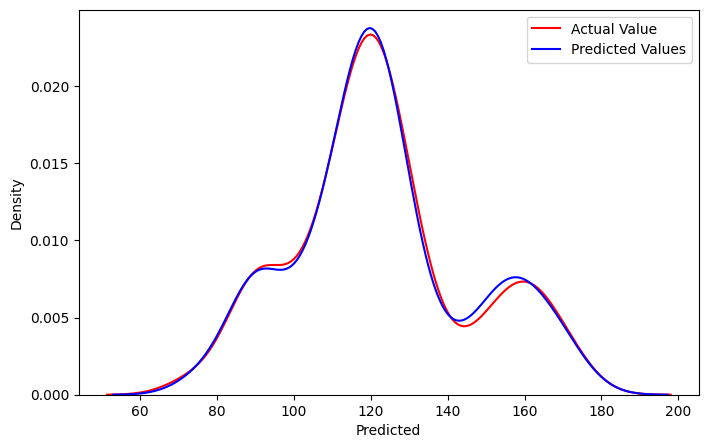

In [ ]:
fig,ax=plt.subplots(figsize=(8,5));
ax1 = sns.distplot(df1['Actual'], hist=False, color="red", label="Actual Value");
ax2=sns.distplot(df1['Predicted'], hist=False, color="blue", label="Predicted Values");
ax.legend();

#***Linear Regression model***
Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [ ]:
y_pred[:10]

array([123.75748411, 119.41011435, 121.37053586, 123.23725452,
       120.93697992, 121.42778935, 119.61009669, 119.50757738,
       121.63531818, 121.26372817])

In [ ]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,y_pred))

r2_score 0.8530125466873726


In [ ]:
#training score

regressor.score(x_train,y_train)

0.8877758904855643

In [ ]:
# accuracy

error_score = metrics.r2_score(y_test, y_pred)
print('accuracy : ', error_score)

accuracy :  0.8530125466873726


In [ ]:
# mean_absolute_error

from sklearn.metrics import mean_absolute_error
mselr=mean_absolute_error(y_test,y_pred)
mselr

6.112232362039995

In [ ]:
#mean square error

from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE : ',mse)

RMSE :  8.695838279068687


In [ ]:
# Lets visualize the actual and predicted values using Distplot:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.reset_index(drop=True)[:5]

,Actual,Predicted
0,128.789993,123.988486
1,115.620003,118.723783
2,139.220001,167.936061
3,120.930000,120.954363
4,93.040001,99.217174


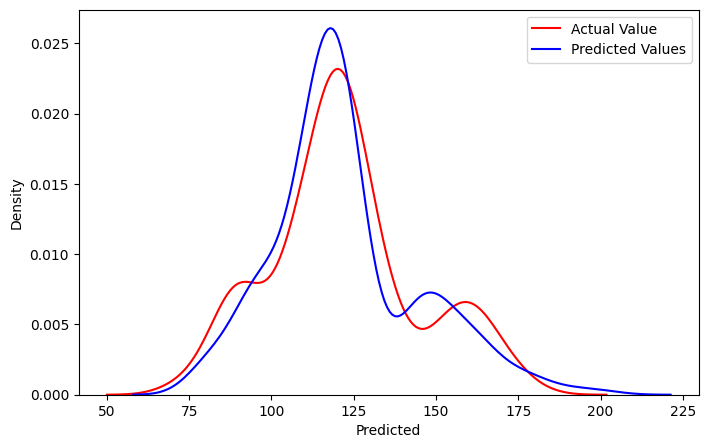

In [ ]:
fig,ax=plt.subplots(figsize=(8,5));
ax1 = sns.distplot(df1['Actual'], hist=False, color="red", label="Actual Value");
ax2=sns.distplot(df1['Predicted'], hist=False, color="blue", label="Predicted Values");
ax.legend();

#***K Nearest Neighbour model***

* he target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
regressor = KNeighborsRegressor()

In [ ]:
# training the model

regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
# prediction on Test Data

test_data_prediction = regressor.predict(x_test)

In [ ]:
#this is the predicted value

print(test_data_prediction)

[126.6500002 120.687999  141.3359986 119.8740006  93.0719984 148.9000002
 117.4100006 112.7959992 141.6020018 115.526001  109.1680006 122.8819994
  89.959999  149.1279998 122.7160004 119.7220004  87.7240006  90.4379988
  90.3959976 122.087999   87.712001  112.6140002 126.0459976 172.3579986
 151.933998  144.7419982 115.1180008 160.7180052 134.1639986 110.5100024
 108.4419998 110.258002  125.4540008 120.4299988 107.0759994 122.2059984
  84.664     113.0980012 125.4487594 144.528     108.408     143.6320008
 108.9039992 146.7459992 132.7759978 148.372     121.9740004 133.3300002
 155.6220002 124.564     127.7899992 108.9039992 125.2919984 104.5500002
 156.719998  118.4220002 113.5440016  88.5919998 162.3560026 116.9020004
  90.1339996 114.7859984  82.5319992 146.2299988 123.25      126.6500002
 125.1399996 117.2740006 159.1779998 122.6759996 122.6839996 172.3579986
 113.7379988 166.2580046 117.2740006 122.0459992 154.9640014 109.0959974
 114.5179992 161.8339966 118.1240006 121.3139982 11

In [ ]:
#training score

regressor.score(x_train,y_train)

0.9641939553131597

In [ ]:
# accuracy

error_score = metrics.r2_score(y_test, test_data_prediction)
print('accuracy : ', error_score)

accuracy :  0.9320551557886056


In [ ]:
# mean_absolute_error

from sklearn.metrics import mean_absolute_error
mselr=mean_absolute_error(y_test,test_data_prediction)
mselr

3.8772955379912655

In [ ]:
#mean square error

from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,test_data_prediction))
print('RMSE : ',mse)

RMSE :  5.912206236796647


In [ ]:
# Lets visualize the actual and predicted values using Distplot:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': test_data_prediction})
df1.reset_index(drop=True)[:5]

,Actual,Predicted
0,128.789993,126.650000
1,115.620003,120.687999
2,139.220001,141.335999
3,120.930000,119.874001
4,93.040001,93.071998


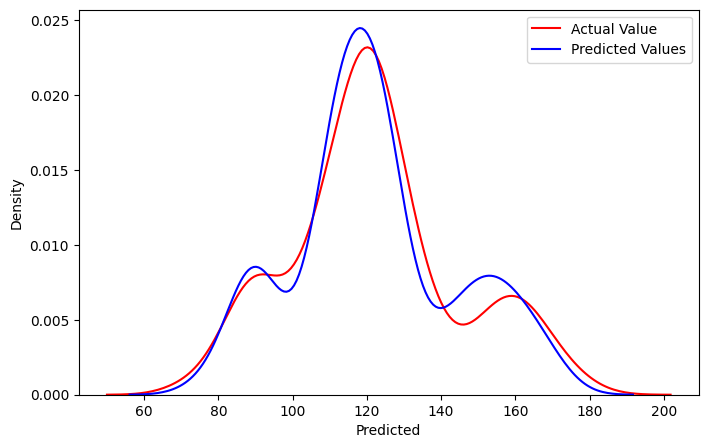

In [ ]:
fig,ax=plt.subplots(figsize=(8,5));
ax1 = sns.distplot(df1['Actual'], hist=False, color="red", label="Actual Value");
ax2=sns.distplot(df1['Predicted'], hist=False, color="blue", label="Predicted Values");
ax.legend();

#***SVM model***

* (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups

In [ ]:
from sklearn.svm import SVR

sv_model = SVR()

#model fitting

sv_model.fit(x_train,y_train)

#predicting model

y_pred = sv_model.predict(x_test)



In [ ]:
training_score = sv_model.score(x_train,y_train)
training_score

0.11309668570581066

In [ ]:
testing_score = sv_model.score(x_test,y_test)
testing_score

0.12792925976006897

In [ ]:
print("train_accuracy:",sv_model.score(x_train,y_train))
print("test_accuracy: ", sv_model.score(x_test,y_test))

train_accuracy: 0.11309668570581066
test_accuracy:  0.12792925976006897


In [ ]:
# accuracy

error_score = metrics.r2_score(y_test, y_pred)
print('accuracy : ', error_score)

accuracy :  0.12792925976006897


In [ ]:
# mean_absolute_error

from sklearn.metrics import mean_absolute_error
mselr=mean_absolute_error(y_test,y_pred)
mselr

15.769578795927698

In [ ]:
#mean square error

from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE : ',mse)

RMSE :  21.181035069066148


In [ ]:
# Lets visualize the actual and predicted values using Distplot:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.reset_index(drop=True)[:5]

,Actual,Predicted
0,128.789993,123.757484
1,115.620003,119.410114
2,139.220001,121.370536
3,120.930000,123.237255
4,93.040001,120.936980


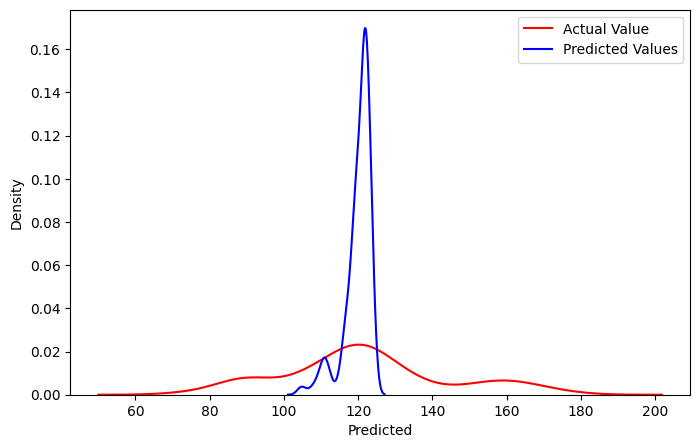

In [ ]:
fig,ax=plt.subplots(figsize=(8,5));
ax1 = sns.distplot(df1['Actual'], hist=False, color="red", label="Actual Value");
ax2=sns.distplot(df1['Predicted'], hist=False, color="blue", label="Predicted Values");
ax.legend();

**The Best Model is Random Forest**

- training Score : 0.9983527056802998
- R2 score : 0.9886902751444948
- Mean Absolute Error : 1.346029744017467
- Root Mean Square Error : 2.4423842591240024